In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
df = pd.read_csv("../data/bank/bank-full.csv",sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

# Data Visualization

In [5]:
df.shape

(45211, 17)

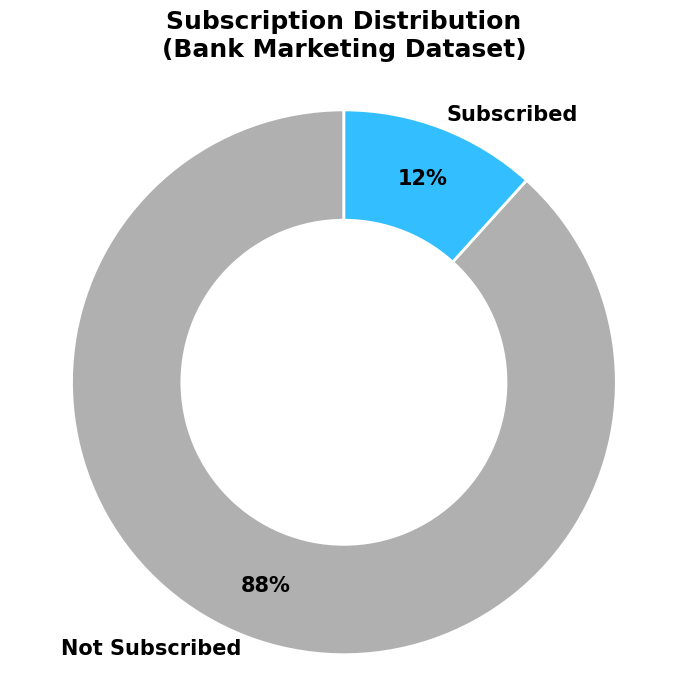

In [6]:
# Count values of y (0 = Not Subscribed, 1 = Subscribed)
counts = df['y'].value_counts().sort_index()
labels = ['Not Subscribed', 'Subscribed']
colors = ['#b0b0b0', '#33bfff']  # Grey and blue for contrast

fig, ax = plt.subplots(figsize=(7, 7))

# Donut chart
wedges, texts, autotexts = ax.pie(
    counts,
    labels=labels,
    autopct='%1.0f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 15, 'fontweight': 'bold', 'color': 'black'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    pctdistance=0.8,    # Percentage inside the wedge
    labeldistance=1.05  # Label just outside the wedge
)

# Draw circle for donut
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)

# Center title, bold and clean
ax.set_title(
    'Subscription Distribution\n(Bank Marketing Dataset)',
    fontsize=18, fontweight='bold', pad=20
)

plt.axis('equal')
plt.tight_layout()
plt.show()

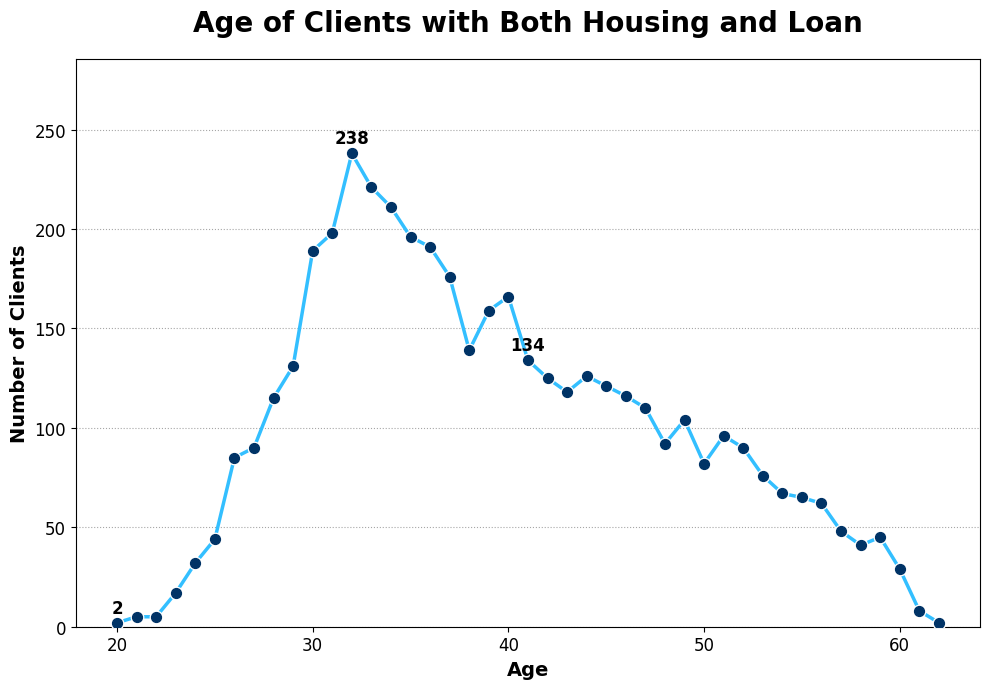

In [7]:
# Assuming df is your DataFrame with the bank marketing data
# Example: Filter for clients who have both housing and loan as 'yes'
housing_loan_yes = df[(df['housing'] == 'yes') & (df['loan'] == 'yes')]

# Group by age and count
age_counts = housing_loan_yes['age'].value_counts().sort_index()

# Create figure with Pew Research style
plt.figure(figsize=(10, 7))

# Plot line with markers - using teal color similar to Pew Research
plt.plot(age_counts.index, age_counts.values, marker='o', color='#33bfff', linewidth=2.5)

# Add markers at data points
plt.scatter(age_counts.index, age_counts.values, color='white', s=80, zorder=3)
plt.scatter(age_counts.index, age_counts.values, color='#003366', s=50, zorder=4)

# Add horizontal dotted grid lines like Pew Research
plt.grid(axis='y', linestyle='dotted', color='gray', alpha=0.7)
plt.grid(axis='x', visible=False)

# Add data labels at key points (e.g., min, max, and a middle point)
max_point = age_counts.idxmax()
min_point = age_counts.idxmin()
mid_idx = len(age_counts) // 2
mid_point = age_counts.index[mid_idx]

# Label these key points
for point in [max_point, min_point, mid_point]:
    plt.text(point, age_counts[point] + 3.0, str(age_counts[point]), 
             fontsize=12, fontweight='bold', ha='center', va='bottom')

# Title and labels in Pew Research style
plt.title('Age of Clients with Both Housing and Loan', 
          fontsize=20, fontweight='bold', color='black', pad=20)
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Number of Clients', fontsize=14, fontweight='bold')

# Clean up the chart
plt.ylim(0, age_counts.max() * 1.2)  # Start y-axis at 0 with room for labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [8]:
# Create a new column to capture combinations of 'yes' only
df['loan_housing'] = df.apply(
    lambda row: f"loan" if row['loan'] == 'yes' and row['housing'] != 'yes' else
                "housing" if row['housing'] == 'yes' and row['loan'] != 'yes' else
                "both" if row['loan'] == 'yes' and row['housing'] == 'yes' else
                None,
    axis=1
)

# Drop rows where neither loan nor housing is 'yes'
filtered = df.dropna(subset=['loan_housing'])

# Add the missing code to create the grouped DataFrame
# Group by marital and loan_housing and calculate counts
grouped_counts = filtered.groupby(['marital', 'loan_housing']).size().reset_index(name='count')

# Calculate total counts per marital for percentage calculation
total_counts = filtered.groupby('marital').size().reset_index(name='total')

# Merge total counts to grouped_counts
merged = pd.merge(grouped_counts, total_counts, on='marital')

# Calculate percentage
merged['percentage'] = (merged['count'] / merged['total']) * 100


# Sort by marital and loan_housing for consistent plotting
grouped = merged.sort_values(by=['marital', 'loan_housing'])
# Create a pivot table to handle missing combinations properly
pivot = grouped.pivot(index='marital', columns='loan_housing', values='percentage').fillna(0)

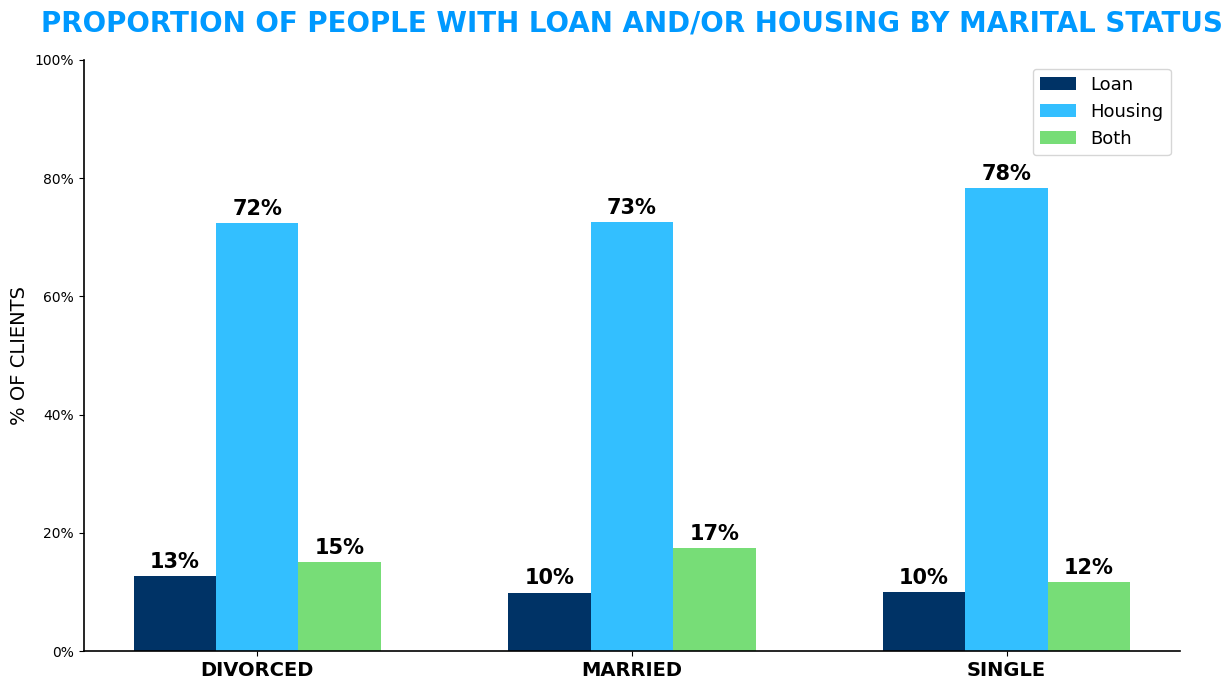

In [9]:
# Assume 'pivot' is your pivot table as in your code, with marital status as index
marital_statuses = pivot.index.tolist()
categories = ['loan', 'housing', 'both']
colors = ['#003366', '#33bfff', '#77dd77']  # Statista-style blue and green

x = np.arange(len(marital_statuses))
width = 0.22

fig, ax = plt.subplots(figsize=(12, 7))

# Plot each category as a separate bar group
bars = []
for i, cat in enumerate(categories):
    vals = pivot[cat].values
    bar = ax.bar(x + (i - 1)*width, vals, width, label=cat.capitalize(), color=colors[i])
    bars.append(bar)

# Annotate percentages on top of each bar
for bar_group in bars:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=15, fontweight='bold')

# Formatting for Statista/Pew style
ax.set_title('PROPORTION OF PEOPLE WITH LOAN AND/OR HOUSING BY MARITAL STATUS', fontsize=20, fontweight='bold', color='#0099ff', pad=20)
ax.set_xticks(x)
ax.set_xticklabels([s.upper() for s in marital_statuses], fontsize=14, fontweight='bold')
ax.set_ylabel('% OF CLIENTS', fontsize=14)
ax.set_ylim(0, 100)
ax.legend(title='', fontsize=13, loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.tight_layout()
plt.show()


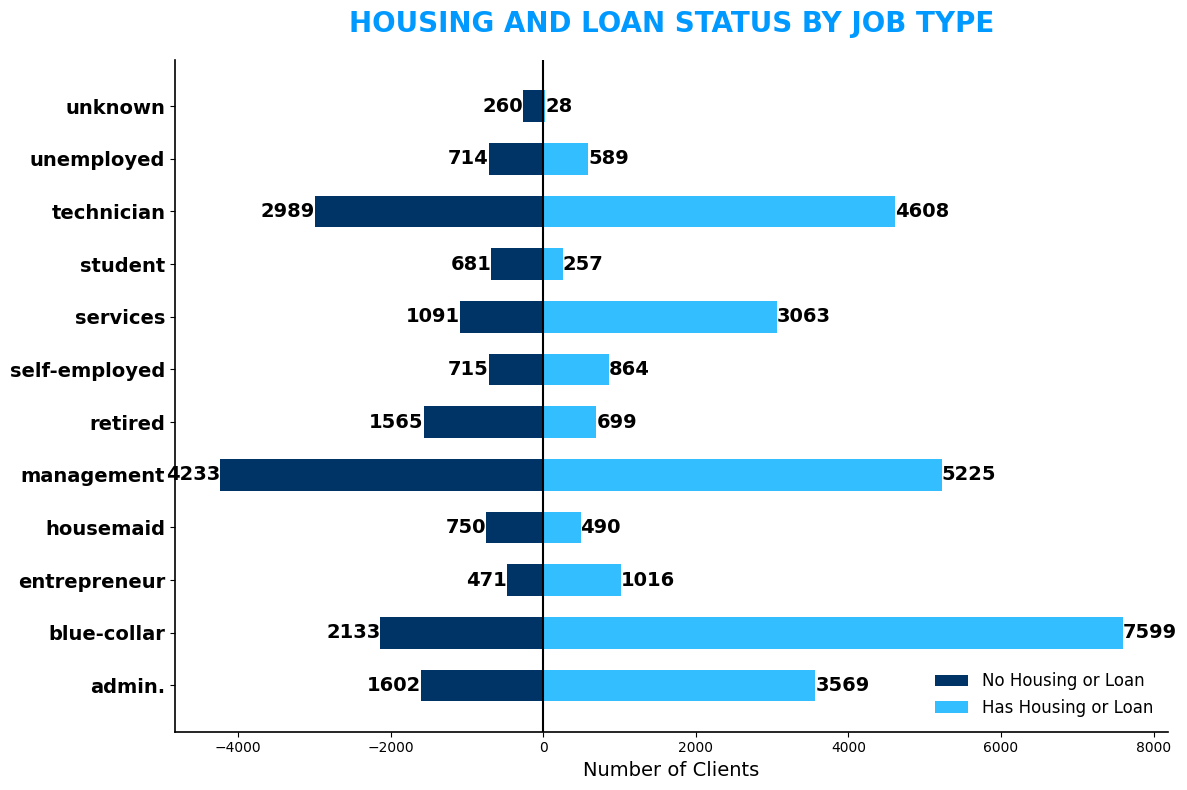

In [10]:
# Keeping your data preparation code
def combined_status(row):
    if row['housing'] == 'yes' or row['loan'] == 'yes':
        return 'yes'
    else:
        return 'no'

df['combined'] = df.apply(combined_status, axis=1)
combined_counts = df.groupby(['job', 'combined']).size().unstack(fill_value=0).reset_index()

# Prepare data for diverging bar chart
plot_data = combined_counts.set_index('job')
plot_data['no'] = -plot_data.get('no', 0)  # negative for left side

# Enhanced plotting with Nielsen/Statista/Pew Research style
fig, ax = plt.subplots(figsize=(12, 8))
y = np.arange(len(plot_data))
bar_width = 0.6

# Updated colors to match the example
bars_no = ax.barh(y, plot_data['no'], height=bar_width, color='#003366', label='No Housing or Loan')
bars_yes = ax.barh(y, plot_data['yes'], height=bar_width, color='#33bfff', label='Has Housing or Loan')

# Add numbers on bars with improved formatting
for bars in [bars_no, bars_yes]:
    for bar in bars:
        width = bar.get_width()
        if width != 0:
            ax.text(width + (0.1 if width > 0 else -0.1), bar.get_y() + bar.get_height()/2,
                    str(abs(int(width))), va='center', ha='left' if width > 0 else 'right', 
                    color='black', fontsize=14, fontweight='bold')

# Enhanced formatting
ax.set_yticks(y)
ax.set_yticklabels(plot_data.index, fontsize=14, fontweight='bold')
ax.axvline(0, color='black', linewidth=1.5)
ax.set_xlabel('Number of Clients', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Statista-style title
ax.set_title('HOUSING AND LOAN STATUS BY JOB TYPE', fontsize=20, 
            fontweight='bold', color='#0099ff', pad=20, loc='center')

# Enhanced legend
ax.legend(fontsize=12, loc='lower right', frameon=False)

plt.tight_layout()
plt.show()


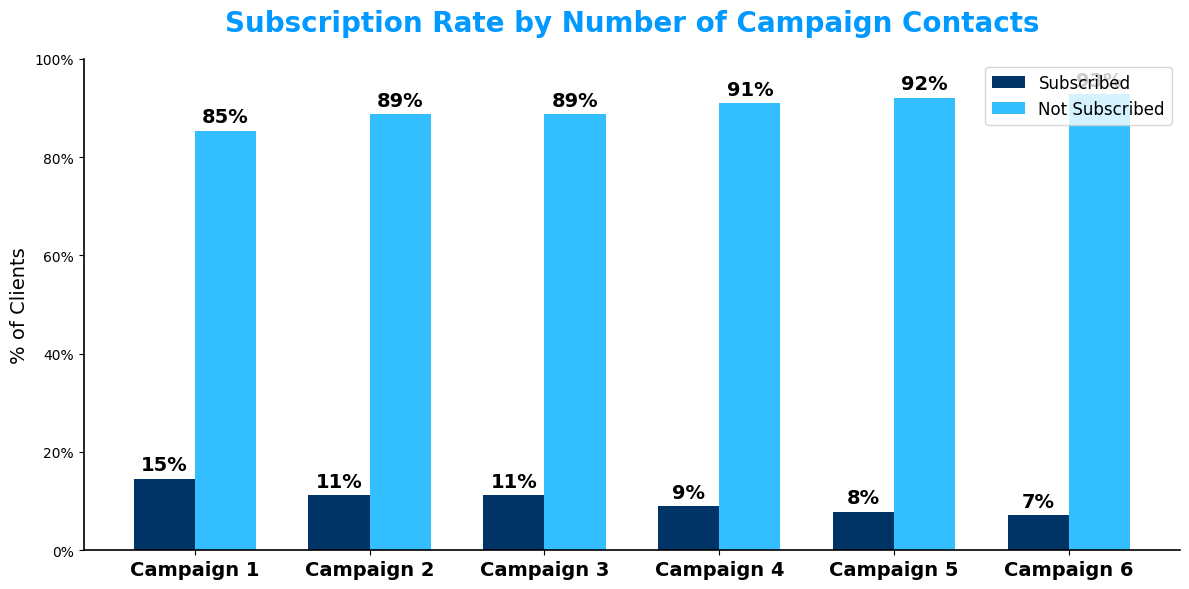

In [11]:
# For this example, let's group by 'campaign' and 'y' (subscription outcome)
campaign_counts = df.groupby(['campaign', 'y']).size().unstack(fill_value=0)
campaign_totals = campaign_counts.sum(axis=1)
campaign_perc = campaign_counts.div(campaign_totals, axis=0) * 100

# Select top N campaign counts for clarity (e.g., campaigns 1-5)
top_campaigns = campaign_perc.index[:6]
categories = [f"Campaign {c}" for c in top_campaigns]
yes_perc = campaign_perc.loc[top_campaigns, 'yes'].values
no_perc = campaign_perc.loc[top_campaigns, 'no'].values

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - width/2, yes_perc, width, label='Subscribed', color='#003366')
bars2 = ax.bar(x + width/2, no_perc, width, label='Not Subscribed', color='#33bfff')

# Annotate values above bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=14, fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=14, fontweight='bold')

# Title and labels
ax.set_title('Subscription Rate by Number of Campaign Contacts', fontsize=20, fontweight='bold', color='#0099ff', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=14, fontweight='bold')
ax.set_ylabel('% of Clients', fontsize=14)
ax.set_ylim(0, 100)
ax.legend(fontsize=12, loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.tight_layout()
plt.show()

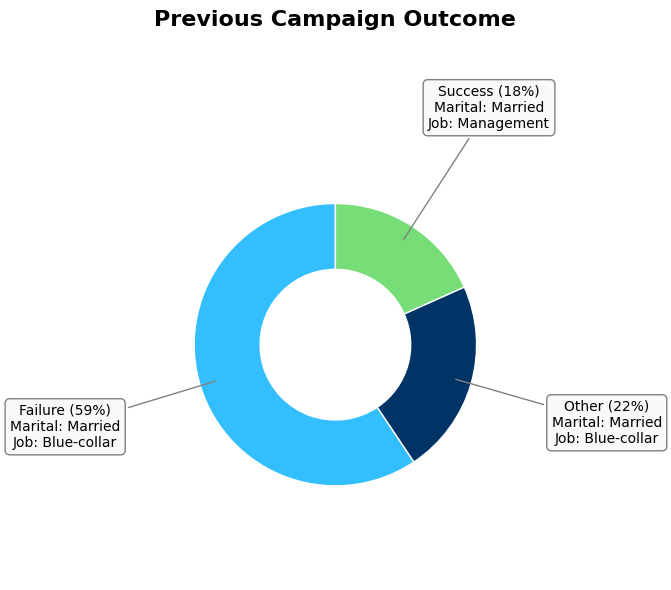

In [18]:
# Filter out rows where poutcome is "unknown"
df_filtered = df[df['poutcome'] != 'unknown']
# Count poutcome values
poutcome_counts = df_filtered['poutcome'].value_counts()
top_reasons_marital = {}
top_reasons_job = {}

for outcome in poutcome_counts.index:
    subset = df_filtered[df_filtered['poutcome'] == outcome]
    top_reasons_marital[outcome] = subset['marital'].value_counts().idxmax().capitalize()
    top_reasons_job[outcome] = subset['job'].value_counts().idxmax().capitalize()

# Prepare pie data
labels = poutcome_counts.index.str.capitalize()
sizes = poutcome_counts.values
colors = ['#33bfff', '#003366', '#77dd77']

fig, ax = plt.subplots(figsize=(8, 6))  # smaller figure
wedges, texts = ax.pie(
    sizes,
    colors=colors,
    startangle=90,
    radius=0.75,  # slightly reduced
    wedgeprops=dict(width=0.35, edgecolor='white'),
    labels=None
)

# Custom annotation
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    label = labels[i]
    outcome_key = poutcome_counts.index[i]
    marital = top_reasons_marital[outcome_key]
    job = top_reasons_job[outcome_key]
    percent = int(sizes[i] / sum(sizes) * 100)

    annotation = (
        f"{label} ({percent}%)\n"
        f"Marital: {marital}\n"
        f"Job: {job}"
    )

    ax.annotate(
        annotation,
        xy=(x * 0.65, y * 0.65), 
        xytext=(x * 1.5, y * 1.5),  # closer annotations
        ha='center', va='center',
        fontsize=10, fontweight='medium',
        bbox=dict(boxstyle='round,pad=0.35', facecolor='#f9f9f9', edgecolor='gray'),
        arrowprops=dict(arrowstyle='-', color='gray', lw=1.0)
    )

# Tighter title padding
ax.set_title(
    'Previous Campaign Outcome',
    fontsize=16, fontweight='bold', pad=60
)

plt.tight_layout()
plt.show()


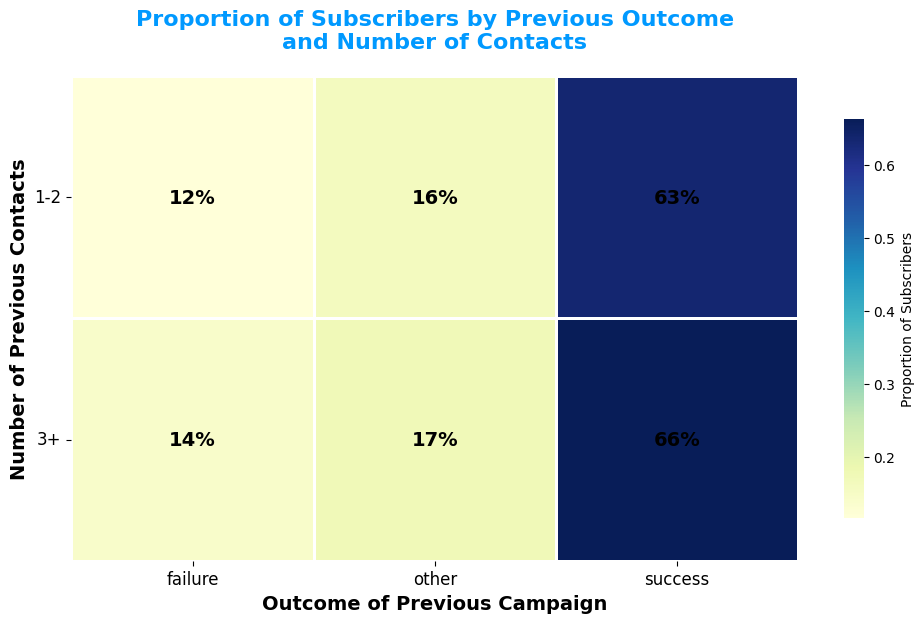

In [22]:
# Create 'previous_bin' for the number of previous contacts
df_filtered.loc[:, 'previous_bin'] = pd.cut(
    df_filtered['previous'],
    bins=[-1, 0, 2, float('inf')],
    labels=['0', '1-2', '3+']
)

# Calculate proportions
prop_data = (
    df_filtered.groupby(['poutcome', 'previous_bin', 'y'], observed=True).size()
    .unstack(fill_value=0)
    .apply(lambda x: x / x.sum(), axis=1)
)

# Extract 'yes' column and reshape for heatmap
heatmap_data = prop_data['yes'].unstack(level=0)

# Plot with enhanced aesthetics
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0%",  # Display as percentage
    cmap='YlGnBu',  # Keep your color palette
    cbar_kws={'label': 'Proportion of Subscribers', 'shrink': 0.8},
    linewidths=0.8,  # Add white grid lines between cells
    linecolor='white',  # White lines for better separation
    annot_kws={"size": 14, "weight": 'bold', "color": 'black'},  # Bold annotations
    square=True  # Make cells square for a cleaner look
)

# Enhanced styling for title and labels
plt.title('Proportion of Subscribers by Previous Outcome\nand Number of Contacts', 
          fontsize=16, weight='bold', color='#0099ff', pad=20)
plt.xlabel('Outcome of Previous Campaign', fontsize=14, weight='bold')
plt.ylabel('Number of Previous Contacts', fontsize=14, weight='bold')

# Remove spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Rotate x-axis labels if needed
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

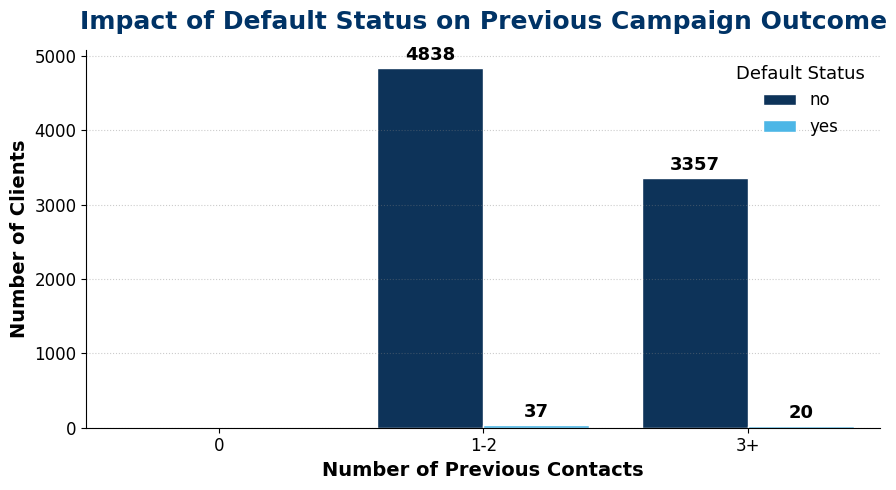

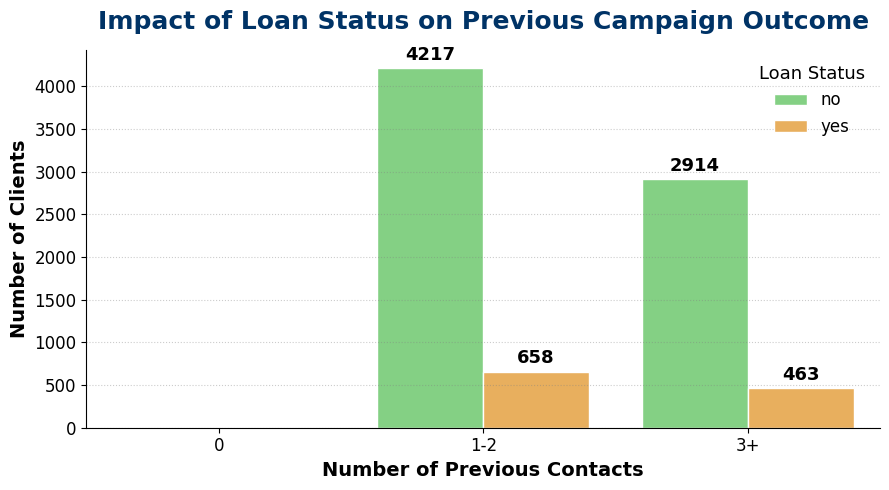

In [23]:
# Pew/Statista style color palettes
default_palette = ['#003366', '#33bfff']   # Dark blue, light blue
loan_palette = ['#77dd77', '#ffb347']      # Soft green, soft orange

# --- Default Status ---
plt.figure(figsize=(9, 5))
ax = sns.countplot(
    x='previous_bin', 
    hue='default', 
    data=df_filtered, 
    palette=default_palette,
    edgecolor='white'
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=13, fontweight='bold', padding=3)

plt.title('Impact of Default Status on Previous Campaign Outcome', fontsize=18, weight='bold', color='#003366', pad=15)
plt.xlabel('Number of Previous Contacts', fontsize=14, weight='bold')
plt.ylabel('Number of Clients', fontsize=14, weight='bold')
plt.legend(title='Default Status', fontsize=12, title_fontsize=13, frameon=False)
sns.despine()
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# --- Loan Status ---
plt.figure(figsize=(9, 5))
ax = sns.countplot(
    x='previous_bin', 
    hue='loan', 
    data=df_filtered, 
    palette=loan_palette,
    edgecolor='white'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=13, fontweight='bold', padding=3)

plt.title('Impact of Loan Status on Previous Campaign Outcome', fontsize=18, weight='bold', color='#003366', pad=15)
plt.xlabel('Number of Previous Contacts', fontsize=14, weight='bold')
plt.ylabel('Number of Clients', fontsize=14, weight='bold')
plt.legend(title='Loan Status', fontsize=12, title_fontsize=13, frameon=False)
sns.despine()
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


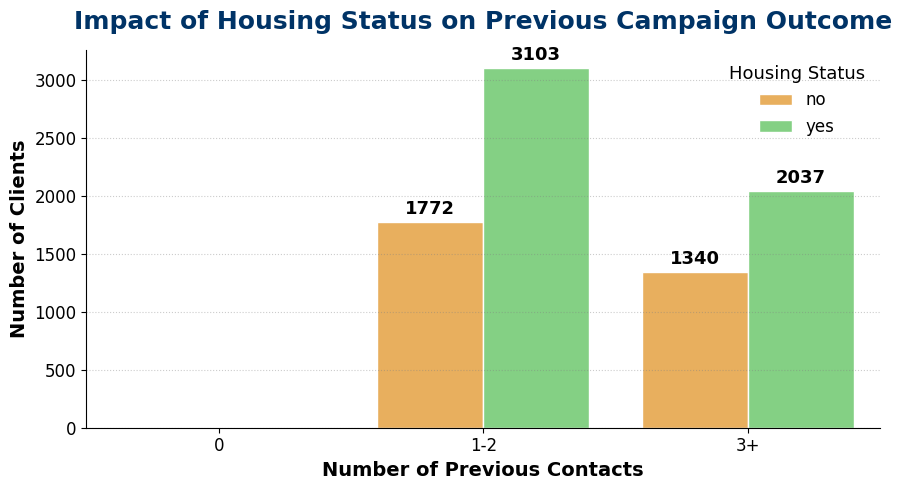

In [24]:
# Housing Status Color Palette
housing_palette = ['#ffb347', '#77dd77']  # Soft orange, soft green

# --- Housing Status ---
plt.figure(figsize=(9, 5))
ax = sns.countplot(
    x='previous_bin', 
    hue='housing', 
    data=df_filtered, 
    palette=housing_palette,
    edgecolor='white'
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=13, fontweight='bold', padding=3)

plt.title('Impact of Housing Status on Previous Campaign Outcome', fontsize=18, weight='bold', color='#003366', pad=15)
plt.xlabel('Number of Previous Contacts', fontsize=14, weight='bold')
plt.ylabel('Number of Clients', fontsize=14, weight='bold')
plt.legend(title='Housing Status', fontsize=12, title_fontsize=13, frameon=False)
sns.despine()
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.4)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
